# Titanic Predictor

##### A Kaggle Data Set

In [179]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
test = pd.read_csv("Titanic Kaggle Data/test.csv")
train = pd.read_csv("Titanic Kaggle Data/train.csv")
sample_submission = pd.read_csv("Titanic Kaggle Data/gender_submission.csv")

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
sample_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


#### NOTE: 

Now, I will tend to read on Titanic and understand the data - 

1. https://en.wikipedia.org/wiki/RMS_Titanic
1. <a href='https://www.ultimatetitanic.com/the-voyage'><i>The route</i></a>

Something about the ticket makes me feel that there could feature engineering here... 



In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EMPTY DATA and its fill 

In [173]:
for i in train.columns:
    print(train[i].isnull().value_counts())

False    891
Name: PassengerId, dtype: int64
False    891
Name: Survived, dtype: int64
False    891
Name: Pclass, dtype: int64
False    891
Name: Name, dtype: int64
False    891
Name: Sex, dtype: int64
False    714
True     177
Name: Age, dtype: int64
False    891
Name: SibSp, dtype: int64
False    891
Name: Parch, dtype: int64
False    891
Name: Ticket, dtype: int64
False    891
Name: Fare, dtype: int64
False    891
Name: Cabin, dtype: int64
False    889
True       2
Name: Embarked, dtype: int64


__I need to deal with age and embarked__

In [215]:
train['Age']=train['Age'].fillna(round(train[(train['Age'].notnull())]['Age'].mean()))

### PLAN
See if I leave p class as labels of 1,2,3 the prediction will get be weight by the number that is meant for class representation.
[AAh! This is called natural ordered relationships. Explained in the medium article below] 

Things I wanna do 
1. One Hot: Passenger Class 
1. One Hot: Sex
1. One Hot: Spouse and sibling 
1. One Hot: Parent and Child
1. One Hot: Embarkment
1. Cabin detail (Present/Absent)
1. Embarked
1. Ticket classification based on pre text
1. Fare Binning ?
1. Age Binning ? (6 width)

Thing I need to read on is label encoding vs one hot encoding impact on category prediction ML model.
<a href='https://medium.com/@michaeldelsole/what-is-one-hot-encoding-and-how-to-do-it-f0ae272f1179'>A good Medium Article on this.</a>


### Performing 1-5 :

In [10]:
Pclass_ohe = pd.get_dummies(train['Pclass'])
Sex_ohe = pd.get_dummies(train['Sex'])
train['Cabin'] = train['Cabin'].notnull().astype('int64')
Embarked_ohe = pd.get_dummies(train['Embarked'])
train_clean =pd.concat([train[['PassengerId', 'Survived']],Pclass_ohe,train[['Name']],Sex_ohe, train[['Age', 'SibSp','Parch', 'Ticket', 'Fare','Cabin']],Embarked_ohe],axis=1)
train_clean.head()
train_clean.columns=['PassengerId','Survived','Pclass_1','Pclass_2','Pclass_3','Name','female','male','Age','SibSp','Parch','Ticket','Fare','Cabin','Boarded_C','Boarded_Q','Boarded_S']

,PassengerId,Survived,1,2,3,Name,female,male,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,1,0,0,0,1,"Braund, Mr. Owen Harris",0,1,22.0,1,0,A/5 21171,7.2500,0,0,0,1
1,2,1,1,0,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,38.0,1,0,PC 17599,71.2833,1,1,0,0
2,3,1,0,0,1,"Heikkinen, Miss. Laina",1,0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1
3,4,1,1,0,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,35.0,1,0,113803,53.1000,1,0,0,1
4,5,0,0,0,1,"Allen, Mr. William Henry",0,1,35.0,0,0,373450,8.0500,0,0,0,1


In [12]:
train_clean

,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Name,female,male,Age,SibSp,Parch,Ticket,Fare,Cabin,Boarded_C,Boarded_Q,Boarded_S
0,1,0,0,0,1,"Braund, Mr. Owen Harris",0,1,22.0,1,0,A/5 21171,7.2500,0,0,0,1
1,2,1,1,0,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,38.0,1,0,PC 17599,71.2833,1,1,0,0
2,3,1,0,0,1,"Heikkinen, Miss. Laina",1,0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1
3,4,1,1,0,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,35.0,1,0,113803,53.1000,1,0,0,1
4,5,0,0,0,1,"Allen, Mr. William Henry",0,1,35.0,0,0,373450,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0,1,0,"Montvila, Rev. Juozas",0,1,27.0,0,0,211536,13.0000,0,0,0,1
887,888,1,1,0,0,"Graham, Miss. Margaret Edith",1,0,19.0,0,0,112053,30.0000,1,0,0,1
888,889,0,0,0,1,"Johnston, Miss. Catherine Helen ""Carrie""",1,0,NaN,1,2,W./C. 6607,23.4500,0,0,0,1
889,890,1,1,0,0,"Behr, Mr. Karl Howell",0,1,26.0,0,0,111369,30.0000,1,1,0,0


### 8. Ticket Prefix 

In [142]:
train_clean['Ticket_prefix'] = train_clean['Ticket'].apply(lambda x: 'None' if(x.split(' ')[0].isdigit()) else x.split(' ')[0])

In [14]:
train_clean.head()

,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Name,female,male,Age,SibSp,Parch,Ticket,Fare,Cabin,Boarded_C,Boarded_Q,Boarded_S,Ticket_prefix
0,1,0,0,0,1,"Braund, Mr. Owen Harris",0,1,22.0,1,0,A/5 21171,7.2500,0,0,0,1,A/5
1,2,1,1,0,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,38.0,1,0,PC 17599,71.2833,1,1,0,0,PC
2,3,1,0,0,1,"Heikkinen, Miss. Laina",1,0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1,STON/O2.
3,4,1,1,0,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,35.0,1,0,113803,53.1000,1,0,0,1,NaN
4,5,0,0,0,1,"Allen, Mr. William Henry",0,1,35.0,0,0,373450,8.0500,0,0,0,1,NaN


In [15]:
tic_num=[]
for x in train_clean['Ticket']:
    y=x.split(' ')
    if y[0]=='LINE':
        tic_num.append(np.nan)
    elif y[0].isdigit():
        tic_num.append(y[0])
    else:
        tic_num.append(y[1])

In [16]:
train_clean['Ticket_num']=tic_num

In [36]:
train_clean.head()

,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Name,female,male,Age,SibSp,Parch,Ticket,Fare,Cabin,Boarded_C,Boarded_Q,Boarded_S,Ticket_prefix,Ticket_num
0,1,0,0,0,1,"Braund, Mr. Owen Harris",0,1,22.0,1,0,A/5 21171,7.2500,0,0,0,1,A/5,21171
1,2,1,1,0,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,38.0,1,0,PC 17599,71.2833,1,1,0,0,PC,17599
2,3,1,0,0,1,"Heikkinen, Miss. Laina",1,0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1,STON/O2.,3101282
3,4,1,1,0,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,35.0,1,0,113803,53.1000,1,0,0,1,NaN,113803
4,5,0,0,0,1,"Allen, Mr. William Henry",0,1,35.0,0,0,373450,8.0500,0,0,0,1,NaN,373450


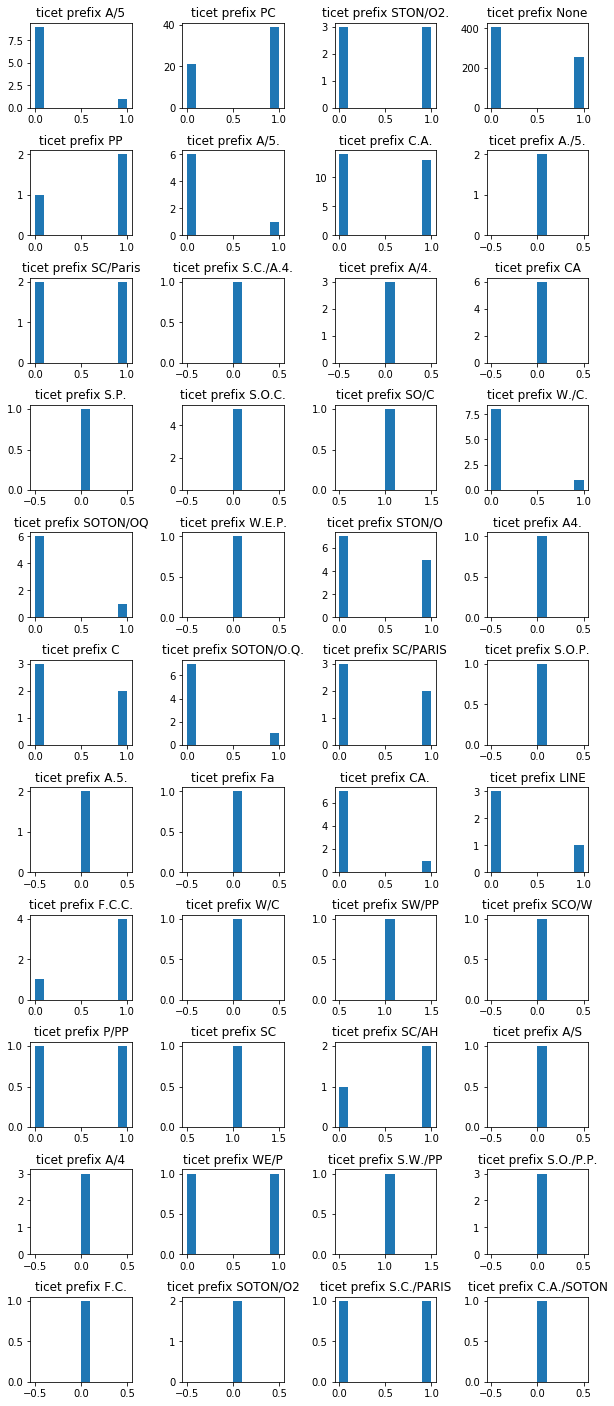

In [143]:
fig, axs = plt.subplots(11,4,figsize=(10,25))
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()
counter=0

for i in train_clean['Ticket_prefix'].unique():
    plot_data = train_clean[train_clean['Ticket_prefix']==i][['Ticket_prefix','Survived']]
    axs[counter].set_title('ticet prefix {}'.format(i))
    axs[counter].hist(x=plot_data['Survived'])
    counter+=1

We see amazing result from ticket prefix,  
* where some prefix result to 100% survivalibility
* some result to 0%
* some result to moderate 50%
* But we get distinctive results which can be used to predict better future :P

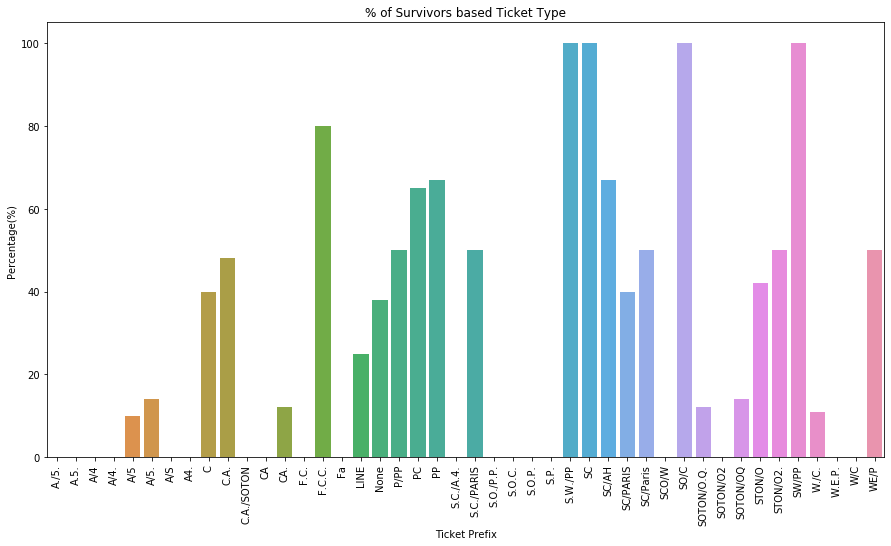

In [153]:
plot_data = pd.pivot_table(data=train_clean, index='Ticket_prefix',values='Survived')*100
plot_data = plot_data.round()

plt.figure(figsize=(15,8))
sns.barplot(data = plot_data,x=plot_data.index,y='Survived')

plt.xlabel('Ticket Prefix')
plt.ylabel('Percentage(%)')
plt.title('% of Survivors based Ticket Type')
plt.xticks(rotation=90)
plt.show()

### 7. Age Binning

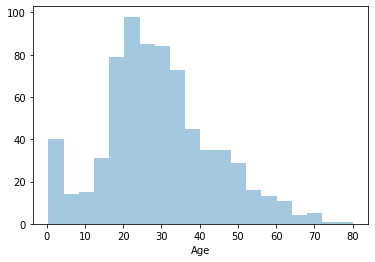

In [88]:
sns.distplot(train_clean['Age'], kde=False)
plt.show()

In [94]:
bins=[i*5 for i in range(0,17)]
train_clean['Age_binned'] =pd.cut(train_clean['Age'],bins)
train_clean

,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Name,female,male,Age,SibSp,Parch,Ticket,Fare,Cabin,Boarded_C,Boarded_Q,Boarded_S,Ticket_prefix,Ticket_num,Age_binned
0,1,0,0,0,1,"Braund, Mr. Owen Harris",0,1,22.0,1,0,A/5 21171,7.2500,0,0,0,1,A/5,21171,"(20.0, 25.0]"
1,2,1,1,0,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,38.0,1,0,PC 17599,71.2833,1,1,0,0,PC,17599,"(35.0, 40.0]"
2,3,1,0,0,1,"Heikkinen, Miss. Laina",1,0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1,STON/O2.,3101282,"(25.0, 30.0]"
3,4,1,1,0,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,35.0,1,0,113803,53.1000,1,0,0,1,NaN,113803,"(30.0, 35.0]"
4,5,0,0,0,1,"Allen, Mr. William Henry",0,1,35.0,0,0,373450,8.0500,0,0,0,1,NaN,373450,"(30.0, 35.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0,1,0,"Montvila, Rev. Juozas",0,1,27.0,0,0,211536,13.0000,0,0,0,1,NaN,211536,"(25.0, 30.0]"
887,888,1,1,0,0,"Graham, Miss. Margaret Edith",1,0,19.0,0,0,112053,30.0000,1,0,0,1,NaN,112053,"(15.0, 20.0]"
888,889,0,0,0,1,"Johnston, Miss. Catherine Helen ""Carrie""",1,0,NaN,1,2,W./C. 6607,23.4500,0,0,0,1,W./C.,6607,NaN
889,890,1,1,0,0,"Behr, Mr. Karl Howell",0,1,26.0,0,0,111369,30.0000,1,1,0,0,NaN,111369,"(25.0, 30.0]"


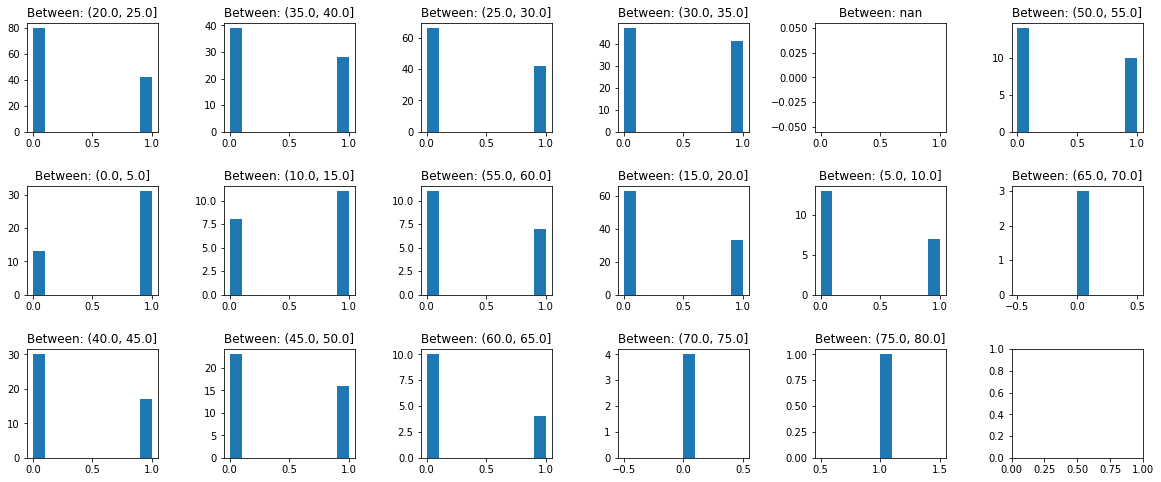

In [101]:
fig, axs = plt.subplots(3,6,figsize=(20,8))
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()
counter=0

for i in train_clean['Age_binned'].unique():
    plot_data = train_clean[train_clean['Age_binned']==i][['Age_binned','Survived']]
    axs[counter].set_title('Between: {}'.format(i))
    axs[counter].hist(x=plot_data['Survived'])
    counter+=1

In [102]:
Age_ohe = pd.get_dummies(train_clean['Age_binned'])

In [107]:
Age_ohe

,"(0, 5]","(5, 10]","(10, 15]","(15, 20]","(20, 25]","(25, 30]","(30, 35]","(35, 40]","(40, 45]","(45, 50]","(50, 55]","(55, 60]","(60, 65]","(65, 70]","(70, 75]","(75, 80]"
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
887,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

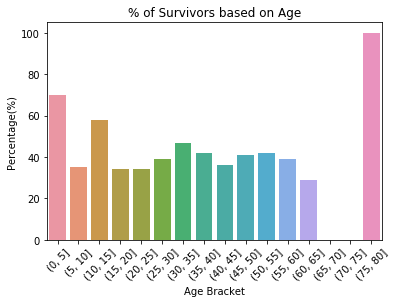

In [134]:
plot_data = pd.pivot_table(data=train_clean, index='Age_binned',values='Survived')*100
plot_data = plot_data.round()
sns.barplot(data = plot_data,x=plot_data.index,y='Survived')
plt.xlabel('Age Bracket')
plt.ylabel('Percentage(%)')
plt.title('% of Survivors based on Age')
plt.xticks(rotation=45)

### 8. Fare Binning

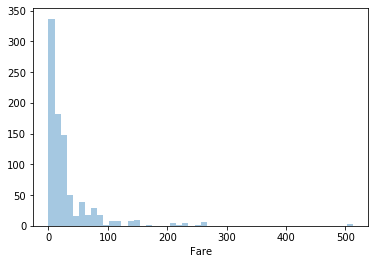

In [110]:
sns.distplot(train_clean['Fare'], kde=False)
plt.show()

In [120]:
bins=[i*10 for i in range(0,11)]
bins.append(520)
train_clean['Fare_binned'] =pd.cut(train_clean['Fare'],bins)
train_clean

,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Name,female,male,Age,SibSp,...,Fare,Cabin,Boarded_C,Boarded_Q,Boarded_S,Ticket_prefix,Ticket_num,Age_binned,Fare Binned,Fare_binned
0,1,0,0,0,1,"Braund, Mr. Owen Harris",0,1,22.0,1,...,7.2500,0,0,0,1,A/5,21171,"(20.0, 25.0]","(0, 10]","(0, 10]"
1,2,1,1,0,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,38.0,1,...,71.2833,1,1,0,0,PC,17599,"(35.0, 40.0]","(70, 80]","(70, 80]"
2,3,1,0,0,1,"Heikkinen, Miss. Laina",1,0,26.0,0,...,7.9250,0,0,0,1,STON/O2.,3101282,"(25.0, 30.0]","(0, 10]","(0, 10]"
3,4,1,1,0,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,35.0,1,...,53.1000,1,0,0,1,NaN,113803,"(30.0, 35.0]","(50, 60]","(50, 60]"
4,5,0,0,0,1,"Allen, Mr. William Henry",0,1,35.0,0,...,8.0500,0,0,0,1,NaN,373450,"(30.0, 35.0]","(0, 10]","(0, 10]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0,1,0,"Montvila, Rev. Juozas",0,1,27.0,0,...,13.0000,0,0,0,1,NaN,211536,"(25.0, 30.0]","(10, 20]","(10, 20]"
887,888,1,1,0,0,"Graham, Miss. Margaret Edith",1,0,19.0,0,...,30.0000,1,0,0,1,NaN,112053,"(15.0, 20.0]","(20, 30]","(20, 30]"
888,889,0,0,0,1,"Johnston, Miss. Catherine Helen ""Carrie""",1,0,NaN,1,...,23.4500,0,0,0,1,W./C.,6607,NaN,"(20, 30]","(20, 30]"
889,890,1,1,0,0,"Behr, Mr. Karl Howell",0,1,26.0,0,...,30.0000,1,1,0,0,NaN,111369,"(25.0, 30.0]","(20, 30]","(20, 30]"


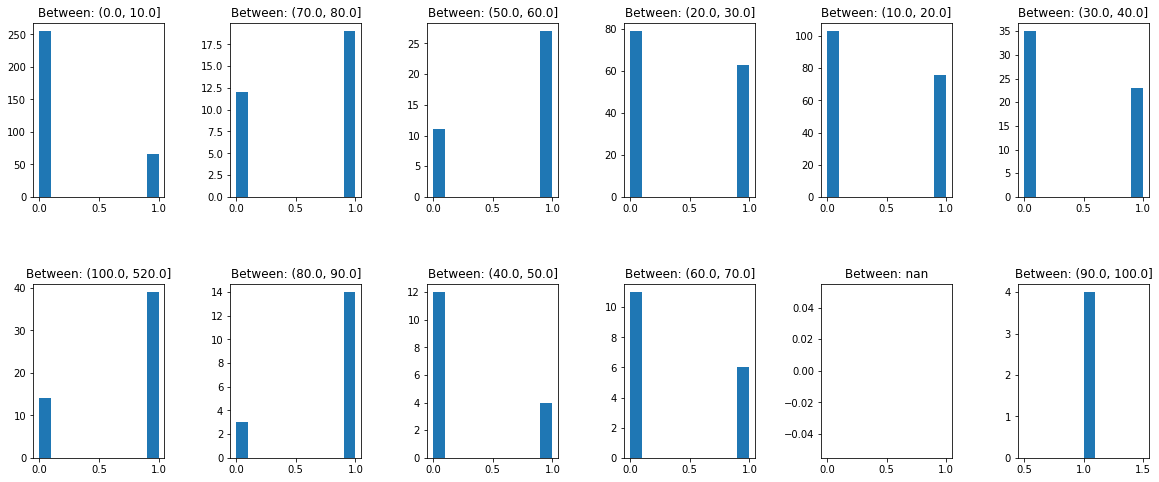

In [123]:
fig, axs = plt.subplots(2,6,figsize=(20,8))
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()
counter=0

for i in train_clean['Fare_binned'].unique():
    plot_data = train_clean[train_clean['Fare_binned']==i][['Fare_binned','Survived']]
    axs[counter].set_title('Between: {}'.format(i))
    axs[counter].hist(x=plot_data['Survived'])
    counter+=1

##### Notice
* __Ratio of dead:survived for Fare 0-70 > 1 (Anomaly exsists at Fare Bracket 50-60)__
* __Ratio of dead:survived for Fare 70+ < 1__

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

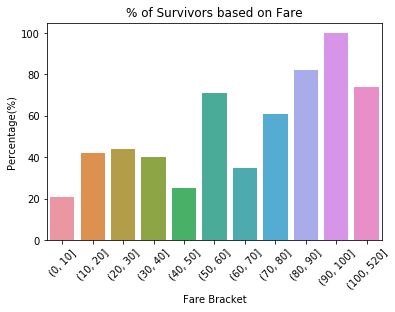

In [133]:
plot_data = pd.pivot_table(data=train_clean, index='Fare_binned',values='Survived')*100
plot_data = plot_data.round()
sns.barplot(data = plot_data,x=plot_data.index,y='Survived')
plt.xlabel('Fare Bracket')
plt.ylabel('Percentage(%)')
plt.title('% of Survivors based on Fare')
plt.xticks(rotation=45)

### Comparing Fare, Ticket_prefix and Survivability

In [167]:
pd.pivot_table(data=train_clean, index='Ticket_prefix', values=['Fare','Survived'], aggfunc={'Survived':['mean'],'Fare':['count','mean','median','min','max']}).sort_values(('Fare','mean'))

Fare                                          Survived
              count       max        mean   median      min      mean
Ticket_prefix                                                        
LINE              4    0.0000    0.000000   0.0000   0.0000  0.250000
SOTON/O.Q.        8    8.0500    7.300000   7.0500   7.0500  0.125000
Fa                1    7.3125    7.312500   7.3125   7.3125  0.000000
SOTON/O2          2    7.9250    7.525000   7.5250   7.1250  0.000000
A/5              10    8.0500    7.650000   7.6500   7.2500  0.100000
A/4.              3    8.0500    7.700000   7.8000   7.2500  0.000000
STON/O           12    7.9250    7.725000   7.9250   7.1250  0.416667
SOTON/OQ          7    8.0500    7.792857   8.0500   7.0500  0.142857
A./5.             2    8.0500    8.050000   8.0500   8.0500  0.000000
S.C./A.4.         1    8.0500    8.050000   8.0500   8.0500  0.000000
A.5.              2    8.0500    8.050000   8.0500   8.0500  0.000000
A/S               1    8.0500    8.050000   8.0500   8.0500  0.000000
A4.               1    8.0500    8.050000   8.0500   8.0500  0.000000
S.P.              1    8.1583    8.158300   8.1583   8.1583  0.000000
S.O./P.P.         3   10.5000    9.516667  10.5000   7.5500  0.000000
C                 5   22.5250   10.123340   7.2500   6.4500  0.400000
SW/PP             1   10.5000   10.500000  10.5000  10.5000  1.000000
SO/C              1   10.5000   10.500000  10.5000  10.5000  1.000000
S.W./PP           1   10.5000   10.500000  10.5000  10.5000  1.000000
W/C               1   10.5000   10.500000  10.5000  10.5000  0.000000
C.A./SOTON        1   10.5000   10.500000  10.5000  10.5000  0.000000
STON/O2.          6   15.8500   10.566667   7.9250   7.9250  0.500000
SC                1   12.0000   12.000000  12.0000  12.0000  1.000000
A/5.              7   16.1000   12.147614  14.5000   7.7333  0.142857
SCO/W             1   12.2750   12.275000  12.2750  12.2750  0.000000
S.O.P.            1   12.5250   12.525000  12.5250  12.5250  0.000000
PP                3   16.7000   14.250000  16.7000   9.3500  0.666667
SC/PARIS          5   27.7208   17.107480  15.0458  13.8583  0.400000
C.A.             27   36.7500   18.327778  15.9000   7.5500  0.481481
A/4               3   24.1500   18.783333  24.1500   8.0500  0.000000
SC/AH             3   26.0000   21.930567  26.0000  13.7917  0.666667
F.C.C.            5   26.2500   22.050000  26.2500  10.5000  0.800000
W./C.             9   34.3750   23.661111  23.4500   7.5500  0.111111
P/PP              2   24.0000   24.000000  24.0000  24.0000  0.500000
None            661  263.0000   27.130899  13.0000   0.0000  0.384266
SC/Paris          4   41.5792   34.403150  41.5792  12.8750  0.500000
S.C./PARIS        2   37.0042   37.004200  37.0042  37.0042  0.500000
CA                6   46.9000   46.900000  46.9000  46.9000  0.000000
F.C.              1   52.0000   52.000000  52.0000  52.0000  0.000000
W.E.P.            1   61.1750   61.175000  61.1750  61.1750  0.000000
CA.               8   69.5500   61.800000  69.5500   7.5500  0.125000
WE/P              2   71.0000   71.000000  71.0000  71.0000  0.500000
S.O.C.            5   73.5000   73.500000  73.5000  73.5000  0.000000
PC               60  512.3292  122.080483  79.2000  25.9250  0.650000